# 심장질환에 따른 질병여부 비교

# 총콜레스테롤
   * 총 콜레스테롤 = 트리글리세라이드/5 + HDL + LDL
   * 총 콜레스테롤 수치가 정상이어도 HDL, LDL, 트리글리세라이드가 비정상인 경우가 있다.
# HDL
   * 40이하 비정상
# LDL
   * 130 이하 정상
   * 130~ 비정상
# 트리글리세라이드
   * 150미만 정상
   * 150이상 비정상

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("font", family="Malgun Gothic")

# altair 라이브러리 사용
!pip install altair
import altair as alt

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [7]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)
심장질환 = pd.read_csv(
    "./심장질환.csv"
)

# 심장질병에 관련 수치들의 이상이 생길 경우를 파이 차트로 표현

- 트리글리세라이드 수치에 이상이 있을경우 유독 고혈압 인원이 많다
- 중성지방이 혈관내에 지방층을 형성해 고혈압을 유발

In [8]:
콜레스테롤별_혈압=심장질환.groupby(['심장질환','혈압'])[['기준년도']].count()
콜레스테롤별_혈압.reset_index(inplace=True)
콜레스테롤별_혈압.rename(columns={'기준년도':'인원 수'},inplace=True)
콜레스테롤별_혈압

,심장질환,혈압,인원 수
0,HDL,고혈압,2500
1,HDL,저혈압,130
2,HDL,정상혈압,11858
3,"HDL,LDL",고혈압,674
4,"HDL,LDL",저혈압,21
5,"HDL,LDL",정상혈압,3799
6,"HDL,LDL,트리글리",고혈압,1189
7,"HDL,LDL,트리글리",저혈압,22
8,"HDL,LDL,트리글리",정상혈압,5025
9,"HDL,트리글리",고혈압,3705


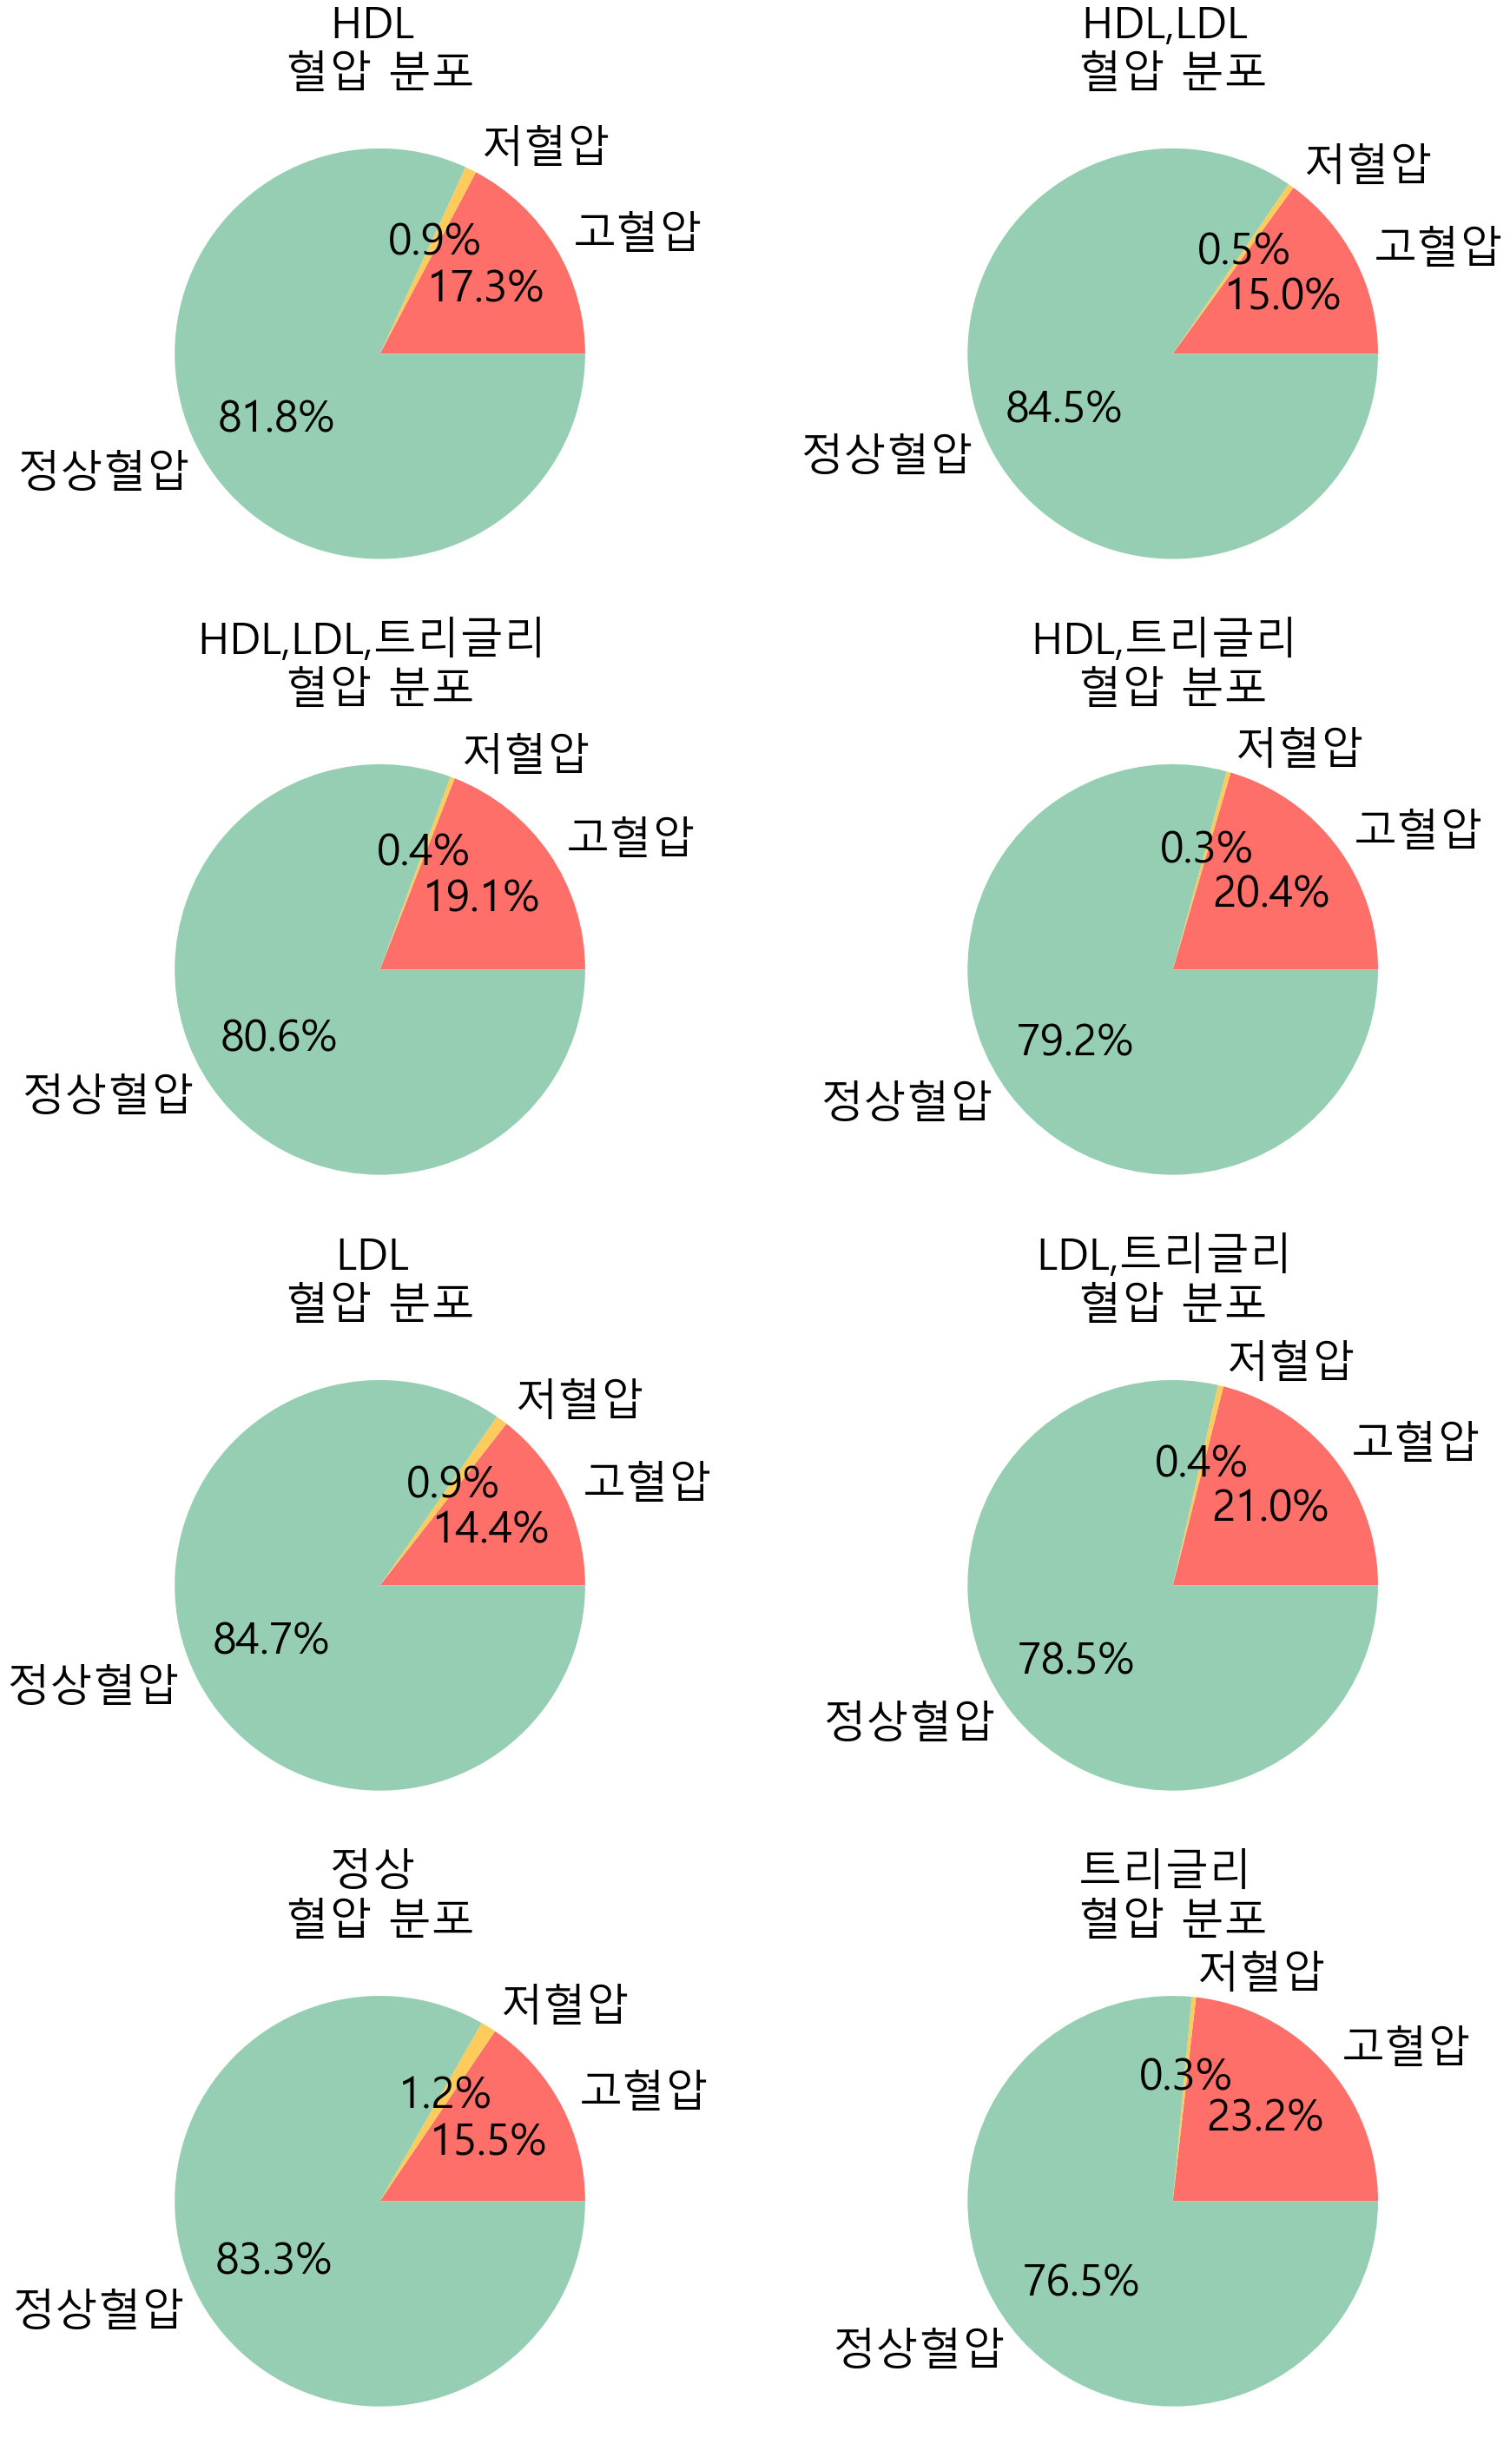

In [9]:
plt.figure(figsize=(30,50))
for i in range(0,8):
    plt.subplot(4,2,i+1)
    plt.pie(콜레스테롤별_혈압.loc[i*3:(i*3)+2,'인원 수'],
            labels=콜레스테롤별_혈압.loc[i*3:(i*3)+2,'혈압'],
            autopct='%.1f%%',
            textprops={'fontsize': 50},
            colors=['#ff6f69','#ffcc5c','#96ceb4']
           )
    plt.title(f'{콜레스테롤별_혈압.loc[i*3,"심장질환"]} \n혈압 분포',fontdict={'fontsize': 50})